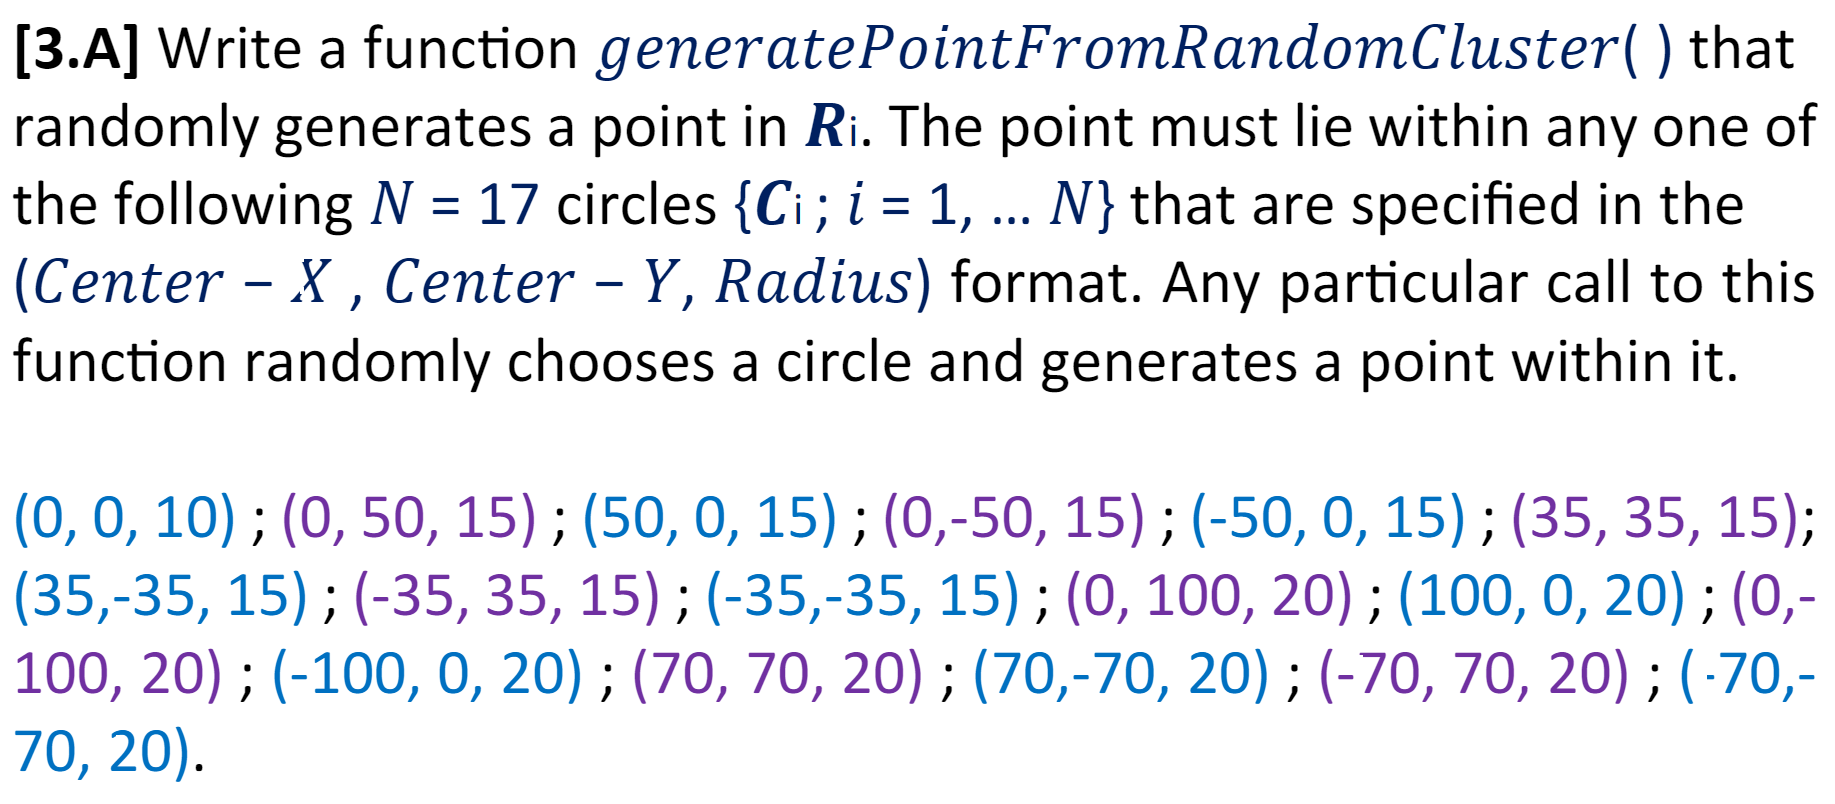

In [1]:
import numpy as np
Circles = [(0,0,10),
           (0,50,15),(50,0,15),(0,-50,15),(-50,0,15),
           (35,35,15),(35,-35,15),(-35,35,15),(-35,-35,15),
           (0,100,20),(0,-100,20),(100,0,20),(-100,0,20),
           (70,70,20),(70,-70,20),(-70,70,20),(-70,-70,20)]



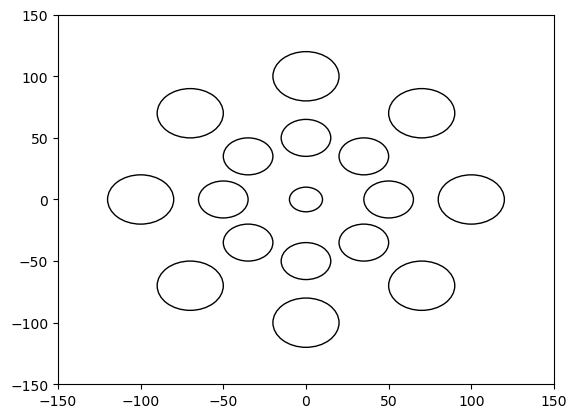

In [2]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
ax.set_xlim(-150, 150)
ax.set_ylim(-150, 150)
for c in Circles:
  C=plt.Circle((c[0],c[1]), c[2], fill=False)
  # axes.set_aspect(1)
  ax.add_patch(C)

plt.show()

In [3]:
x=np.random.uniform(0,17,1)

x,int(x)

(array([0.335104]), 0)

In [4]:
np.random.random(1)

array([0.79263035])

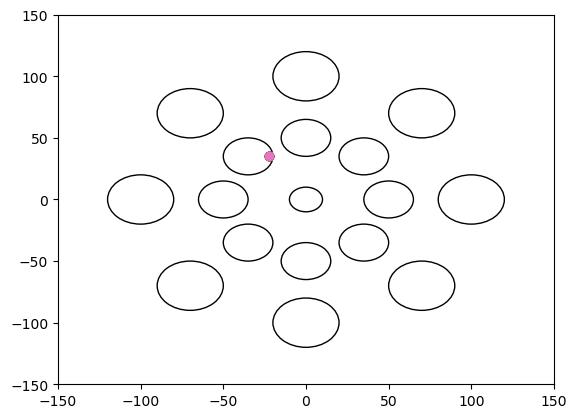

In [5]:
import numpy as np
def generatePointFromRandomCluster():
    c_i = Circles[int(np.random.uniform(0,17,1)[0])]
    # print(c_i)
    # radius = np.random.random(1)*c_i[2]
    x_i = c_i[0]+np.random.uniform(0,c_i[2],1)
    y_i = c_i[1]+np.random.uniform(0,c_i[2],1)
    return np.array([x_i,y_i])
data=generatePointFromRandomCluster()
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
ax.set_xlim(-150, 150)
ax.set_ylim(-150, 150)
for c in Circles:
  C=plt.Circle((c[0],c[1]), c[2], fill=False)
  # axes.set_aspect(1)
  ax.add_patch(C)
  ax.scatter(data[0],data[1])
plt.show()

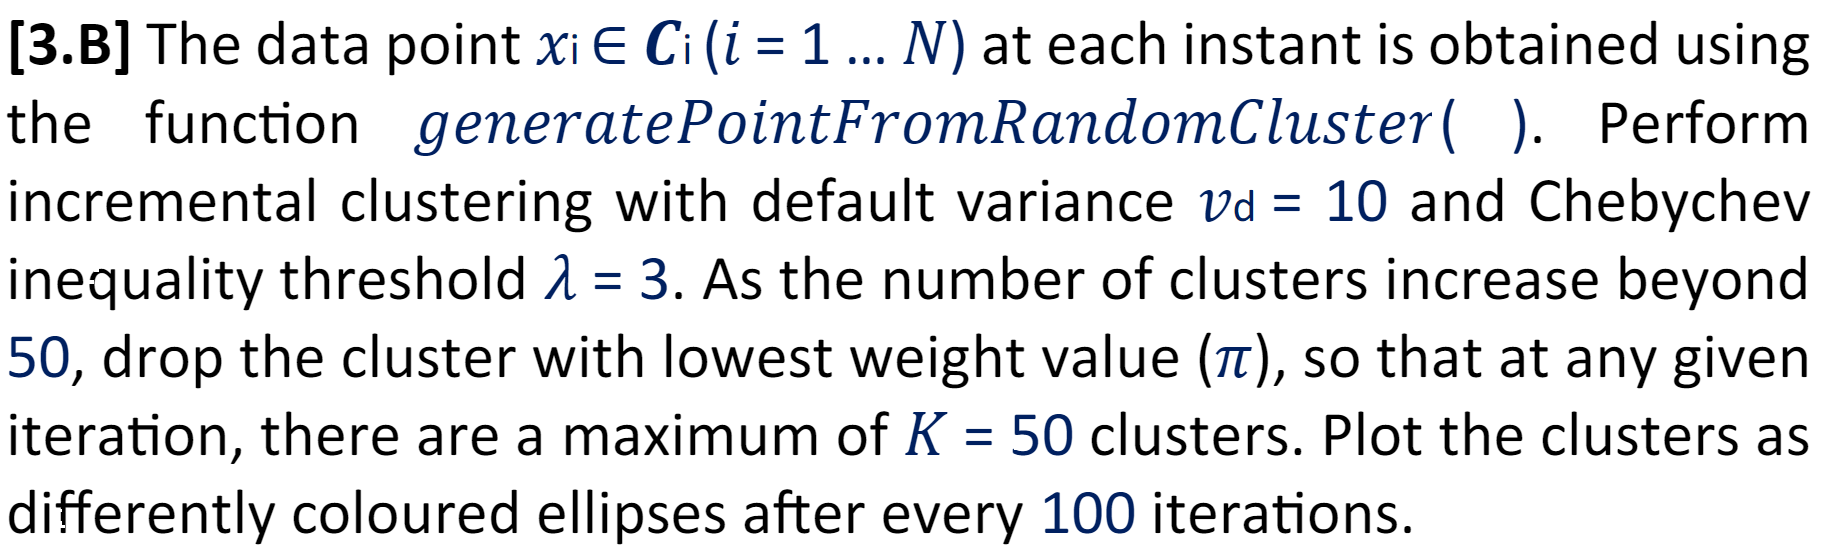

In [6]:
def New_cluster(cluster_set,x_t,cov,alpha):
    cluster_set.append([x_t,cov,alpha])
    return

In [7]:
def Update_Param(index,x_t,cluster_set,t):
    # calculate Beta value of cluster index
    if t < 500:
        alpha_t = 1/t
    else:
        alpha_t = 1/500

    beta_index = alpha_t/cluster_set[index][2]

    # Update mean
    pre_mean = cluster_set[index][0]
    cluster_set[index][0] = pre_mean*(1-beta_index) + beta_index*(x_t)

    # Update Co-var
    cluster_set[index][1] = (1 - beta_index)*(cluster_set[index][1] + beta_index*((x_t-pre_mean)@(x_t-pre_mean).T))

    # Update Prior
    cluster_set[index][2] = (1 - 1/t)*cluster_set[index][2] + (1/t)





In [8]:
lam = 3
Max_clusters = 50
plot_iter = 100
cluster_set = []
cov = np.array([[10,0],[0,10]]).T
t = 1
New_cluster(cluster_set,generatePointFromRandomCluster(),cov,1)
print(cluster_set)

[[array([[-95.49159869],
       [  5.56774737]]), array([[10,  0],
       [ 0, 10]]), 1]]


In [11]:
while True:
    #print(len(cluster_set))

    x_t = generatePointFromRandomCluster()
    dist = []
    for i in range(len(cluster_set)):
        #print(cluster_set[i][1])
        d=(x_t - cluster_set[i][0]).T@np.linalg.inv(cluster_set[i][1])@(x_t - cluster_set[i][0])
        dist.append(d)
    dist = np.array(dist)
    cluster_present = any(dist <= lam**2)
    if cluster_present:
        clust_index = np.argmin(dist)
        Update_Param(clust_index,x_t,cluster_set,t)
    else:
        if len(cluster_set) < Max_clusters:
            New_cluster(cluster_set,x_t,cov,1/t)
        else:
            min_alpha_index = np.argmin(np.array(cluster_set)[:,2])
            cluster_set.pop(min_alpha_index)
            if t < 500:
                New_cluster(cluster_set,x_t,cov,1/t)
            else:
                New_cluster(cluster_set,x_t,cov,1/500)
    #print(t)
    if t%100 == 0:
        print("\n")
        for cluster in cluster_set:
            mean = cluster[0]
            cov = cluster[1]
            u=mean[0]   #x-position of the center
            v=mean[1]   #y-position of the center
            a=cov[0][0]     #radius on the x-axis
            b=cov[1][1]    #radius on the y-axis

            t_ = np.linspace(0, 2*np.pi, 100)
            plt.plot( u+a*np.cos(t_) , v+b*np.sin(t_) )

        plt.grid()
        plt.show()
    t+=1

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (50, 3) + inhomogeneous part.

In [ ]:
print(len(cluster_set))

In [ ]:
print(t)